In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ***Charger le fichier CSV***

In [ ]:
df_fifa19 = pd.read_csv('Fifa19.csv')

# ***Afficher les premières lignes***

In [ ]:
df_fifa19.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


# ***Statistiques descriptives***

In [ ]:
df_fifa19.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,8778.000000,8778.000000,8778.000000,8778.000000,8778.000000,8762.000000,8762.000000,8762.000000,8762.000000,8762.000000,...,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,211417.412509,24.855890,68.663477,74.057530,1648.877763,1.206003,2.988016,2.478772,19.967017,51.920110,...,50.053076,61.376441,49.083210,49.519119,47.322223,16.881406,16.622532,16.407259,16.655747,16.975916
std,31016.702442,4.628487,7.300839,6.162047,283.423073,0.521993,0.678374,0.814949,16.074204,19.179905,...,16.200042,11.753696,20.764587,22.533169,22.311906,18.476475,17.600912,17.155250,17.792705,18.764614
min,41.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,7.000000,13.000000,3.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,196192.000000,21.000000,64.000000,70.000000,1499.000000,1.000000,3.000000,2.000000,9.000000,40.000000,...,40.000000,54.000000,30.000000,28.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,216451.500000,24.000000,69.000000,74.000000,1692.000000,1.000000,3.000000,2.000000,17.500000,57.000000,...,51.000000,63.000000,55.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,234687.500000,28.000000,74.000000,78.000000,1850.000000,1.000000,3.000000,3.000000,27.000000,67.000000,...,62.000000,70.000000,67.000000,69.000000,67.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246617.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# ***Afficher les types de données de chaque colonne et vérifier les valeurs manquantes***

In [ ]:
print(df_fifa19.info())
print("\nValeurs manquantes par colonne :")
print(df_fifa19.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      8778 non-null   object 
 1   Playing_in_League         8778 non-null   object 
 2   ID                        8778 non-null   int64  
 3   Name                      8778 non-null   object 
 4   Age                       8778 non-null   int64  
 5   Photo                     8778 non-null   object 
 6   Nationality               8778 non-null   object 
 7   Flag                      8778 non-null   object 
 8   Overall                   8778 non-null   int64  
 9   Potential                 8778 non-null   int64  
 10  Club Logo                 8778 non-null   object 
 11  Value                     8778 non-null   object 
 12  Wage                      8778 non-null   object 
 13  Special                   8778 non-null   int64  
 14  Preferre

# ***Remplacer les valeurs manquantes ' AVEC LA MOYENNE '***

In [ ]:
for column in df_fifa19.select_dtypes(include='number').columns:
    df_fifa19[column] = df_fifa19[column].fillna(df_fifa19[column].mean())

# ***Normalisation des colonnes numériques***

In [ ]:
if df_fifa19.shape[0] > 0:
    scaler = MinMaxScaler()
    numeric_columns = df_fifa19.select_dtypes(include='number').columns
    df_fifa19[numeric_columns] = scaler.fit_transform(df_fifa19[numeric_columns])
else:
    print("DataFrame is empty. Skipping scaling.")
    print(numeric_columns)

# ***Détecter et traiter les valeurs aberrantes***

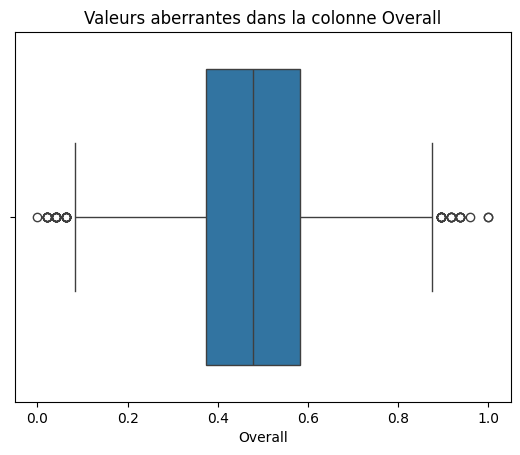

In [ ]:
sns.boxplot(x=df_fifa19['Overall'])
plt.title("Valeurs aberrantes dans la colonne Overall")
plt.show()

# Suppression des valeurs aberrantes

q1 = df_fifa19['Overall'].quantile(0.25)
q3 = df_fifa19['Overall'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_fifa19 = df_fifa19[(df_fifa19['Overall'] >= lower_bound) & (df_fifa19['Overall'] <= upper_bound)]

# ***Analyse de corrélation entre les colonnes numériques***

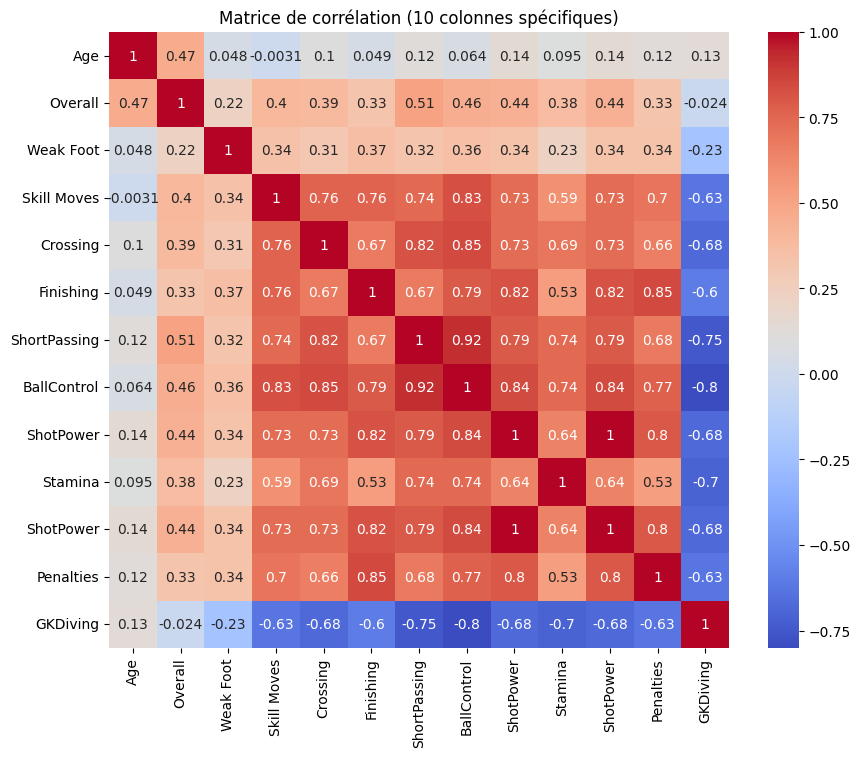

In [ ]:
specific_columns = ['Age', 'Overall', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'ShortPassing', 'BallControl', 'ShotPower', 'Stamina', 'ShotPower', 'Penalties', 'GKDiving']
corr_matrix = df_fifa19[specific_columns].corr()

# Affichage la heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (10 colonnes spécifiques)")
plt.show()

# ***Diagramme en barres pour visualiser la répartition des joueurs par  position***

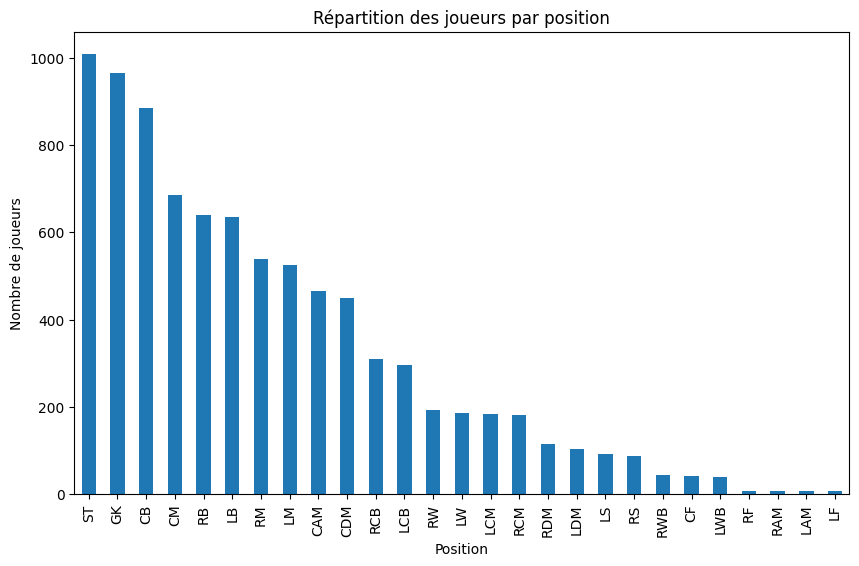

In [ ]:
df_fifa19['Position'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Répartition des joueurs par position")
plt.xlabel("Position")
plt.ylabel("Nombre de joueurs")
plt.show()

# ***Filtrer et afficher les données en fonction d’une condition***

In [ ]:
filtered_data = df_fifa19[df_fifa19['Overall'] > 90]
filtered_data

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
33,Manchester United,English Premier League (1),193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
99,FC Barcelona,Spain Primera Division (1),158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
100,FC Barcelona,Spain Primera Division (1),176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
189,Juventus,Italian Serie A (1),20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
214,Paris Saint-Germain,French Ligue 1 (1),190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
271,Manchester City,English Premier League (1),192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
333,Chelsea,English Premier League (1),183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


# ***Visualisation de la distribution des âges des joueurs***

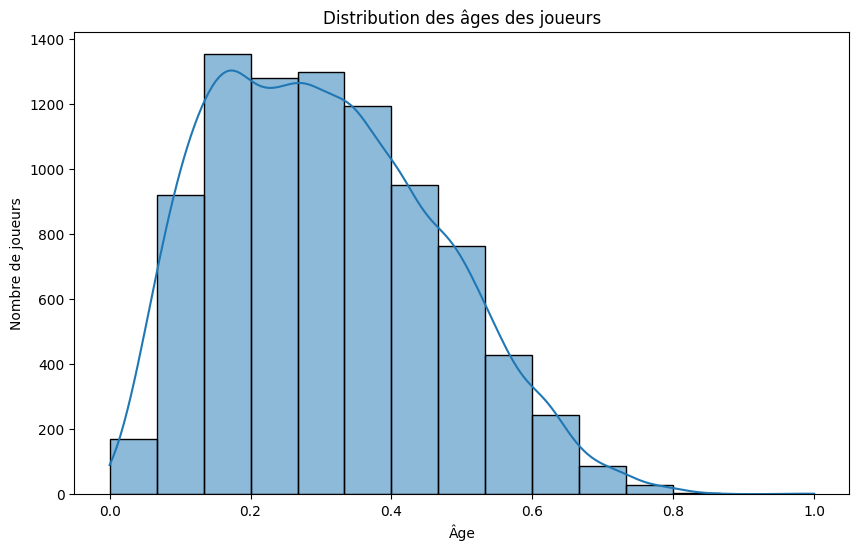

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_fifa19['Age'], bins=15, kde=True)
plt.title("Distribution des âges des joueurs")
plt.xlabel("Âge")
plt.ylabel("Nombre de joueurs")
plt.show()

# ***le nombre de joueurs par nationalité***

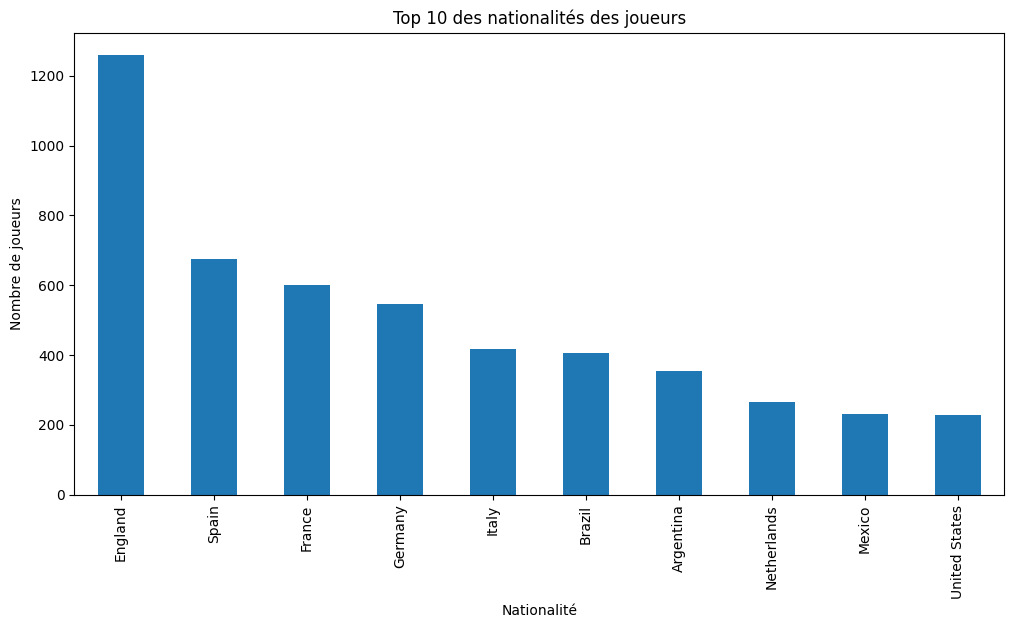

In [ ]:
plt.figure(figsize=(12, 6))
df_fifa19['Nationality'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des nationalités des joueurs")
plt.xlabel("Nationalité")
plt.ylabel("Nombre de joueurs")
plt.show()

# ***la corrélation entre la vitesse de sprint et l'accélération***

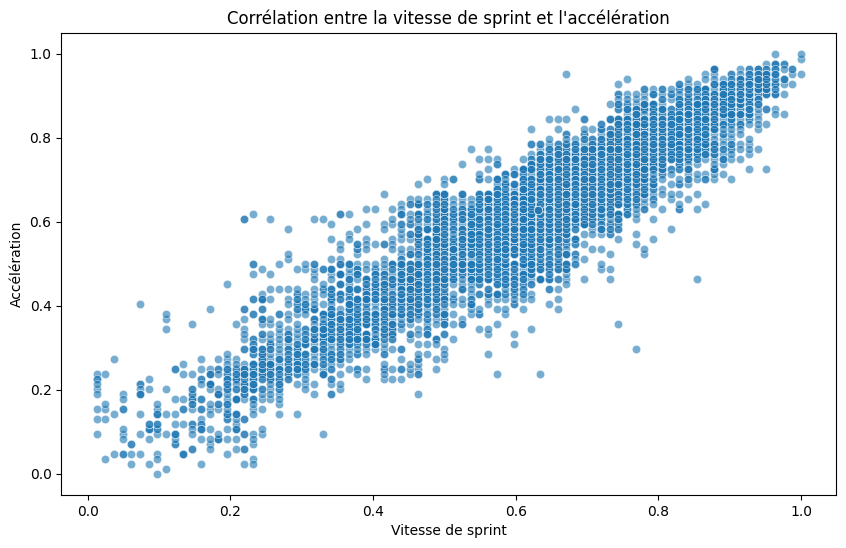

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SprintSpeed', y='Acceleration', data=df_fifa19, alpha=0.6)
plt.title("Corrélation entre la vitesse de sprint et l'accélération")
plt.xlabel("Vitesse de sprint")
plt.ylabel("Accélération")
plt.show()

# ***la distribution de la note globale par position de joueur***

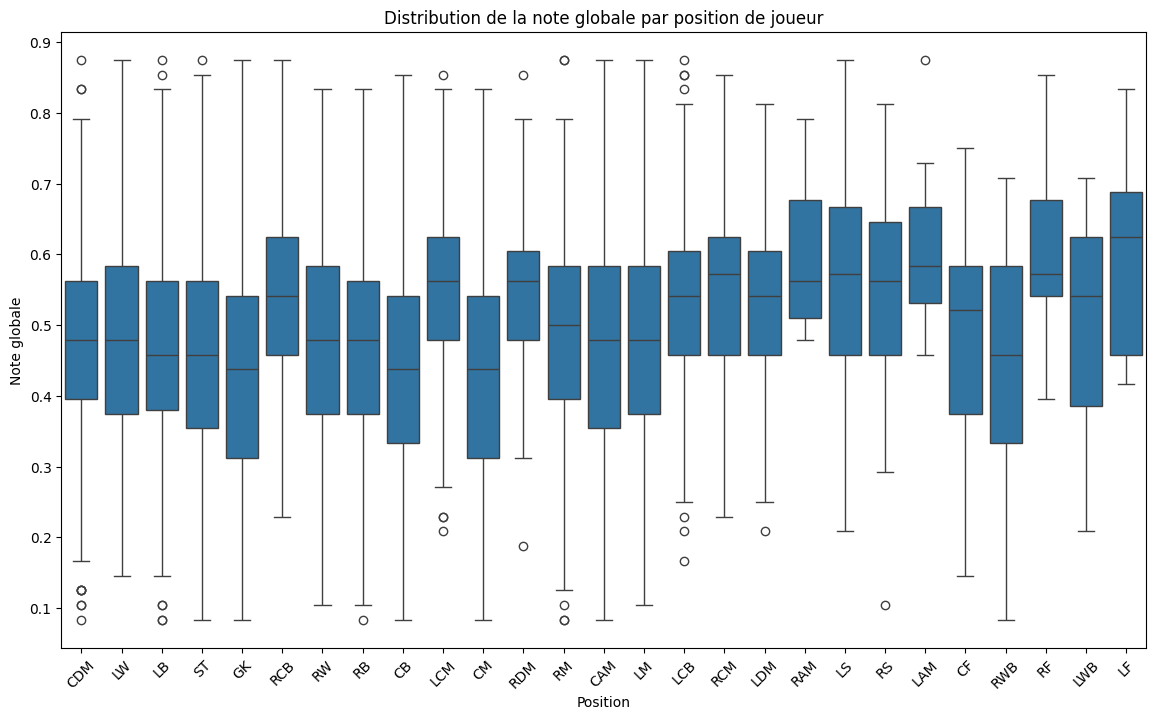

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Overall', data=df_fifa19)
plt.title("Distribution de la note globale par position de joueur")
plt.xlabel("Position")
plt.ylabel("Note globale")
plt.xticks(rotation=45)
plt.show()

# ***la répartition du pied préféré des joueurs << gauche ou droit >>***

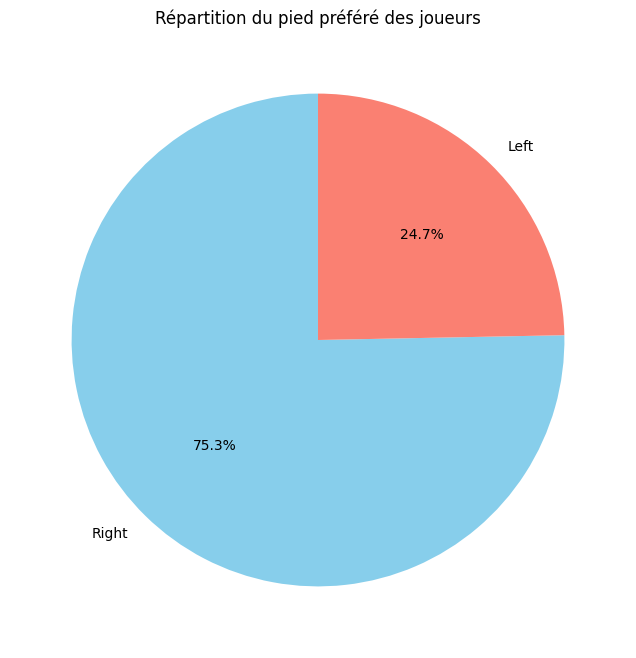

In [ ]:
plt.figure(figsize=(8, 8))
df_fifa19['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Répartition du pied préféré des joueurs")
plt.ylabel("")
plt.show()

# ***le rapport entre la valeur des joueurs et leur potentiel***

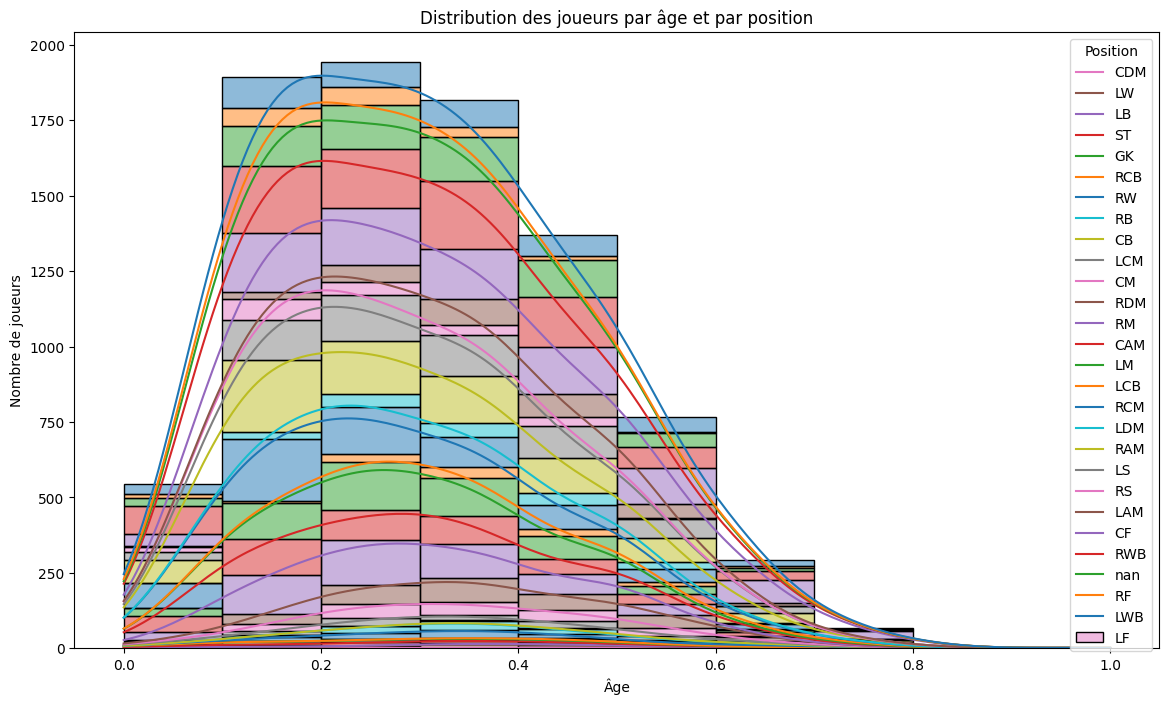

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_fifa19, x='Age', hue='Position', multiple="stack", bins=10, palette='tab10', kde=True, legend=False)
plt.title("Distribution des joueurs par âge et par position")
plt.xlabel("Âge")
plt.ylabel("Nombre de joueurs")
plt.legend(title='Position', labels=df_fifa19['Position'].unique(), loc='upper right')
plt.show()

**Interprétation: Ce nuage de points montre comment la valeur des joueurs est liée à leur potentiel. Si le nuage de points indique une tendance à la hausse cela signifie que les joueurs ayant une valeur plus élevée ont également tendance à avoir un potentiel plus élevé.**

# ***Analyse de la compétitivité des ligues basée sur les évaluations globales des joueurs***

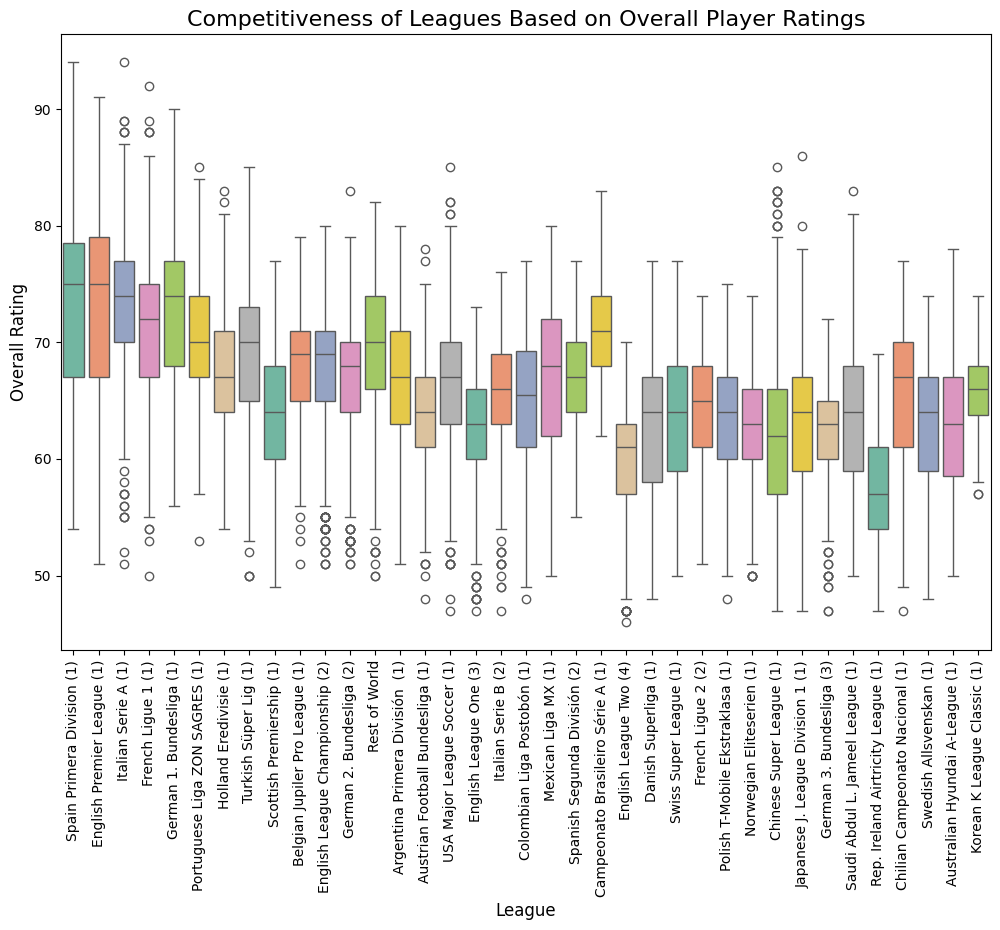

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Playing_in_League',
    y='Overall',
    hue='Playing_in_League',
    data=df_fifa19_filtered,
    palette='Set2',
    dodge=False,
    legend=False
)
plt.title('Competitiveness of Leagues Based on Overall Player Ratings', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# ***Analyse de la compétitivité des ligues en fonction des salaires des joueurs***

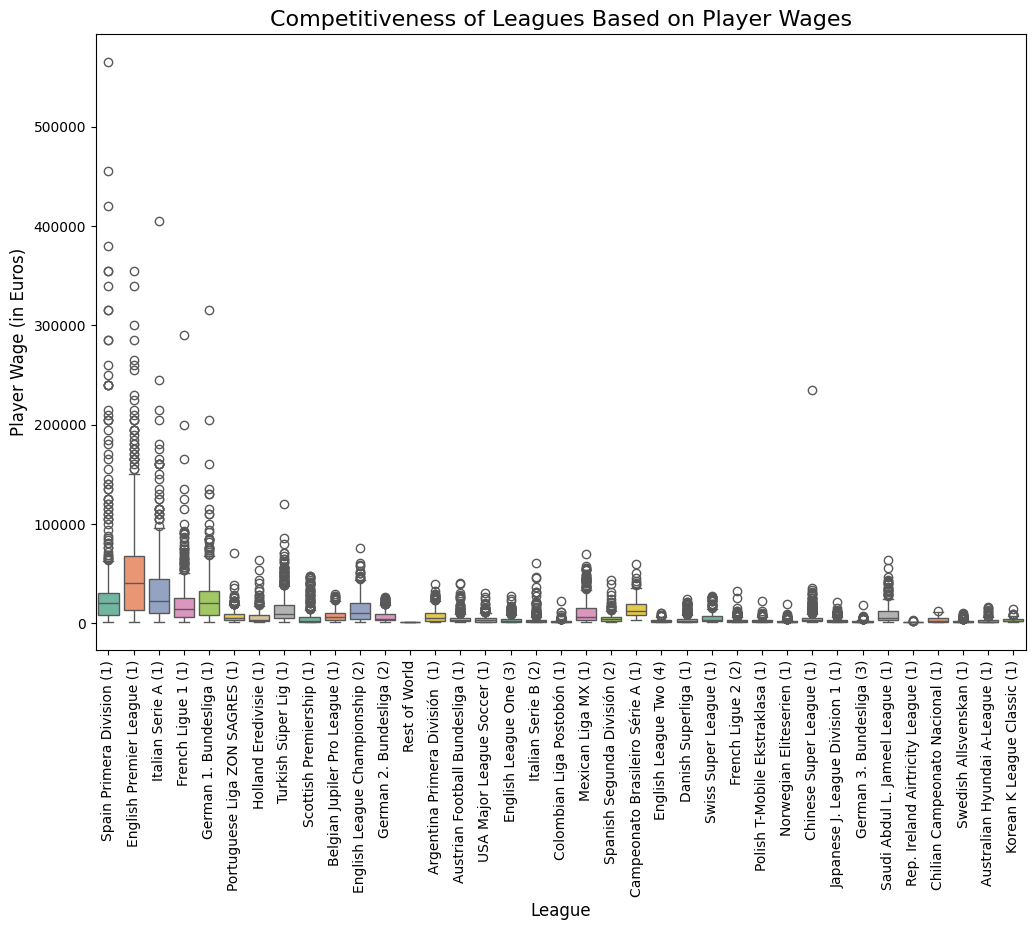

In [ ]:
# Conversion des salaires en valeurs numériques
df_fifa19_filtered['Wage'] = df_fifa19_filtered['Wage'].apply(lambda x: x.replace('€', '').replace('K', 'e3').replace('M', 'e6') if isinstance(x, str) else x)
df_fifa19_filtered['Wage'] = pd.to_numeric(df_fifa19_filtered['Wage'], errors='coerce')

# Supprimer les valeurs nulles après conversion
df_fifa19_filtered = df_fifa19_filtered.dropna(subset=['Wage'])

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Playing_in_League',
    y='Wage',
    hue='Playing_in_League',
    data=df_fifa19_filtered,
    palette='Set2',
    dodge=False,
    legend=False
)
plt.title('Competitiveness of Leagues Based on Player Wages', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Player Wage (in Euros)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# ***Distribution du potentiel des joueurs à travers les ligues***

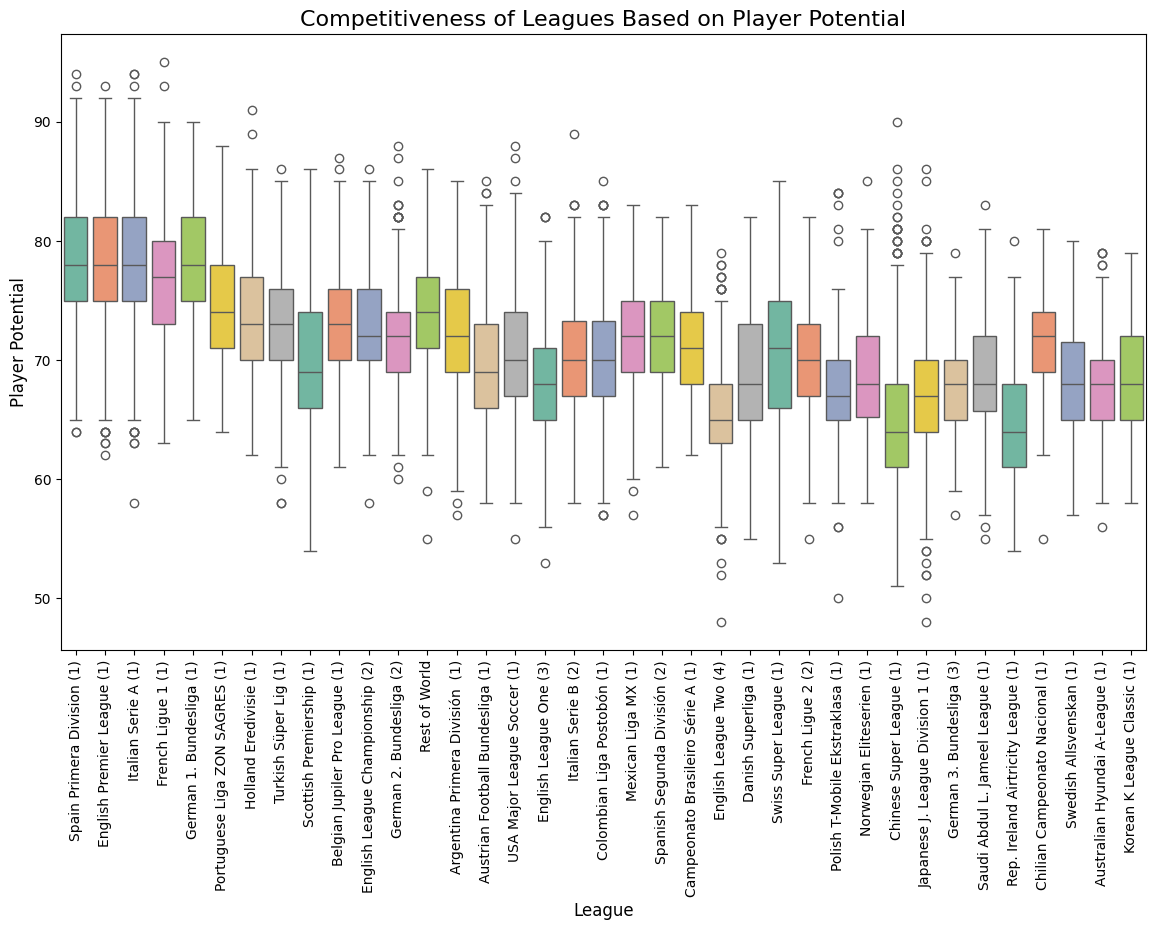

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Playing_in_League',
    y='Potential',
    hue='Playing_in_League',
    data=df_fifa19_filtered,
    palette='Set2',
    dodge=False,
    legend=False
)
plt.title('Competitiveness of Leagues Based on Player Potential', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Player Potential', fontsize=12)
plt.xticks(rotation=90)
plt.show()